Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


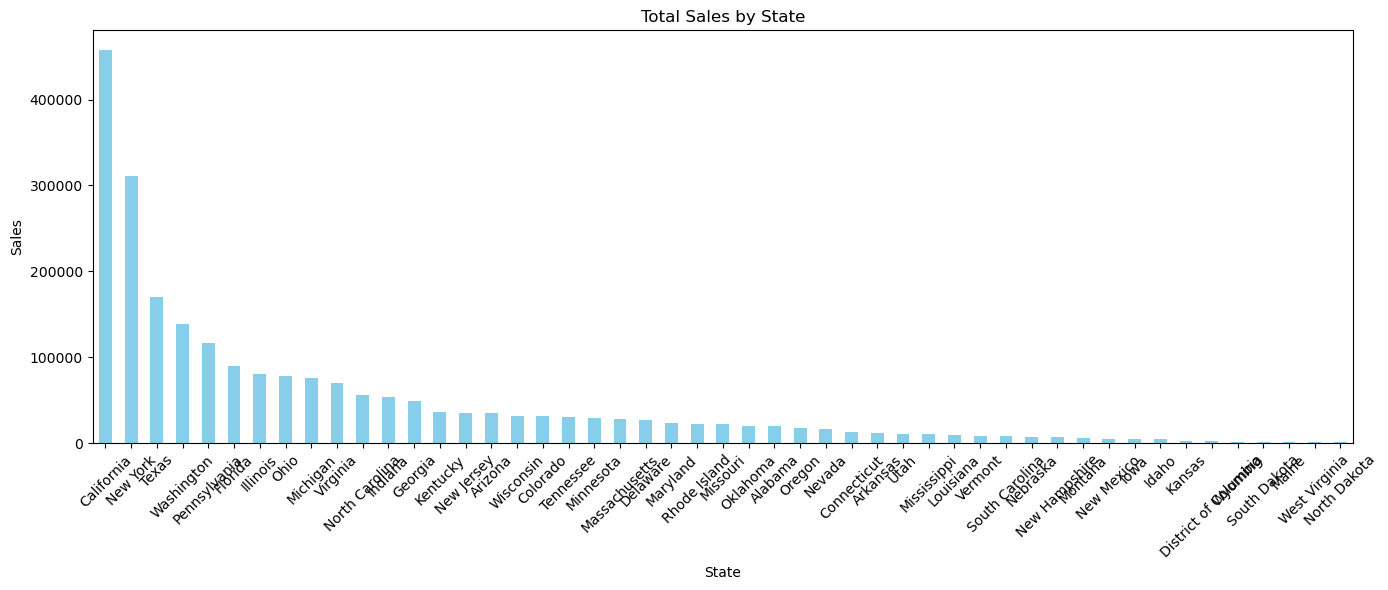

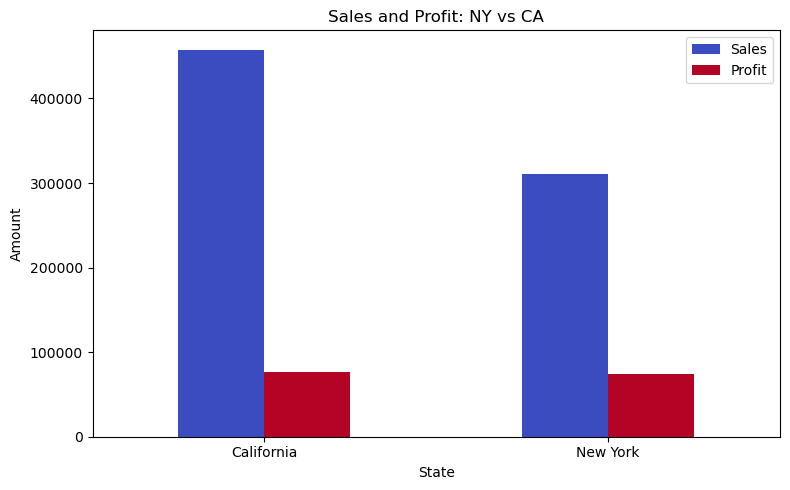

Outstanding customer in New York:
 Customer ID  Customer Name
TA-21385     Tom Ashbrook     13723.498
Name: Sales, dtype: float64


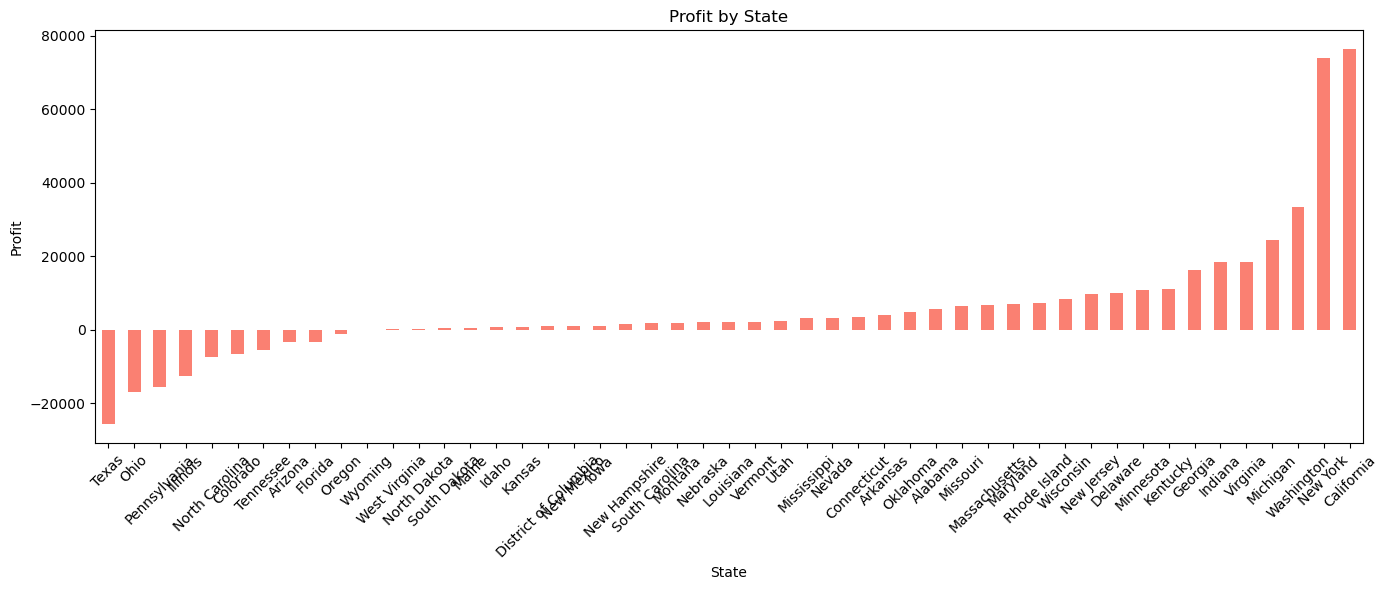

In [1]:
# Mini-Project: Marketing Strategy Analysis

# Step 1: Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2: Set Working Directory
os.chdir(r"C:\DI-Bootcamp\Week3\Day5\ExerciseXP")

# Step 3: Load Dataset
df = pd.read_excel("US Superstore data.xls")

# Step 4: Preprocessing
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Step 5: States with Most Sales
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Compare New York and California
ny_ca = df[df['State'].isin(['New York', 'California'])]
summary_ny_ca = ny_ca.groupby('State')[['Sales', 'Profit']].sum()
summary_ny_ca.plot(kind='bar', figsize=(8,5), title='Sales and Profit: NY vs CA', colormap='coolwarm')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 7: Outstanding Customer in New York
ny_customers = df[df['State'] == 'New York']
top_customer = ny_customers.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False).head(1)
print("Outstanding customer in New York:\n", top_customer)

# Step 8: Profitability by State
profit_by_state = df.groupby('State')['Profit'].sum().sort_values()
plt.figure(figsize=(14,6))
profit_by_state.plot(kind='bar', color='salmon')
plt.title('Profit by State')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
